In [15]:
# Importing required libraries
# pip install pycountry-convert #Do that if is the first time you are using this lybrary

import pycountry_convert as pc  # Extension of Python package pycountry providing conversion functions.
                                # For finding the continent based on specific country
import pandas as pd
import numpy as np

import seaborn as sns #For making plots
sns.set(style='darkgrid')

import matplotlib.pyplot as plt


In [2]:
import os
print(os.getcwd())

C:\Users\GBTC406006ur\Documents\ImmersiveDataAnalytics


In [16]:
#1.- Reading csv file
df= pd.read_csv('datasets/master.csv', encoding='ISO-8859-1')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [17]:
#2 Rename some columns
df=df.rename(columns={'suicides_no': 'suicidesNo', 'suicides/100k pop':'suicides_100kPop', 'gdp_for_year ($)': 'GDP_year$',
                      'gdp_per_capita ($)': 'GDP_perCapita$'})

In [5]:
#Review the columns after made the rename
df.head()

,country,year,sex,age,suicidesNo,population,suicides_100kPop,country-year,HDI for year,gdp_for_year ($),GDP_perCapita$,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Data Cleansing

In [18]:
#3.- Identify how many NaN values we have for HDI (Human Development Index) -- 19,456 NaN rows
sum(pd.isnull(df['HDI for year']))

19456

# Deleting columns and Rows

In [34]:
#4 Drop 2 columns HDI because it has too many NaN values 
df.drop(['HDI for year'], axis=1, inplace=True)


In [35]:
# Select all rows where Country equal to 'Republic of Korea'
df[df.country == 'Republic of Korea']

,country,year,sex,age,suicidesNo,population,suicides_100kPop,country-year,gdp_for_year ($),GDP_perCapita$,generation,countryCode,continentCode


In [36]:
# Delete all rows where country is Republic of Korea, due to is not exist anymore
df.drop(df[df['country'] == 'Republic of Korea'].index, inplace = True) 

In [37]:
df.head()

,country,year,sex,age,suicidesNo,population,suicides_100kPop,country-year,gdp_for_year ($),GDP_perCapita$,generation,countryCode,continentCode
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,AL,EU
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,AL,EU
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,AL,EU
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,AL,EU
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,AL,EU


# Creating Functions to add 2 new columns 

In [33]:
# FOR Loopig to get name of de Continent based on name of the country

# pc.country_name_to_country_alpha2('Argentina') --  'AR'
#pc.country_alpha2_to_continent_code('AR')

#pc.convert_continent_code_to_continent_name('SA')
# pc.country_name_to_country_alpha3('Argentina') -- 'ARG'




In [20]:
# Defying a function to find out the code of a Country
def findCountryCode(country):
    return pc.country_name_to_country_alpha2(country)



In [21]:
# Defying a function to find out the code of a Continent depends on a Country code passed as parameter
def findContinentCode(countryCode):
    return pc.country_alpha2_to_continent_code(countryCode)


In [ ]:

#df['countryCode'] = df.apply(lambda x: pc.country_name_to_country_alpha2(x['country']))


# Creating For Loop to add 2 new colums and populate it with data

In [22]:
# Defyning a list and add elements to the the list, after create a new field in the dataFrame
# and populate itwith the all elements of the list

countryCode=[]

for n in df['country']:
    try:
        countryCode.append((findCountryCode(n)))
    except:
        countryCode.append(None)
df['countryCode'] =countryCode                                               

In [23]:
continentCode=[]

for n in df['countryCode']:
    try:
        continentCode.append((findContinentCode(n)))
    except:
        continentCode.append(None)
        
df['continentCode'] =continentCode    

In [38]:
df.count()

country               27448
year                  27448
sex                   27448
age                   27448
suicidesNo            27448
population            27448
suicides_100kPop      27448
country-year          27448
 gdp_for_year ($)     27448
GDP_perCapita$        27448
generation            27448
countryCode           27148
continentCode         27148
dtype: int64

In [15]:
df

,country,year,sex,age,suicidesNo,population,suicides_100kPop,country-year,HDI for year,gdp_for_year ($),GDP_perCapita$,generation,countryCode,continentCode
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,AL,EU
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,AL,EU
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,AL,EU
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,AL,EU
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,AL,EU
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,AL,EU
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent,AL,EU
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers,AL,EU
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,AL,EU
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X,AL,EU


In [63]:
# Using regular expression to extract all 
# columns which has letter 'a' or 'A' in its name. 
missingCountry = df['countryCode'] =='None' 
missingCountryDf= df[missingCountry]

print(missingCountryDf.shape)

(0, 14)


In [64]:
# Using regular expression to extract all 
# columns which has letter 'a' or 'A' in its name. 
missingCountry = df['countryCode'] == 'NAN' 
missingCountryDf= df[missingCountry]

print(missingCountryDf.shape)

(0, 14)


In [65]:
# Using regular expression to extract all 
# columns which has letter 'a' or 'A' in its name. 
missingCountry = df['countryCode'] =='None' 


In [66]:
missingCountryDf= df[df.countryCode == 'None']

print(missingCountryDf.shape)

(0, 14)


In [67]:
#find rows equal to 101

df.loc[df['countryCode']== 'AL']

,country,year,sex,age,suicidesNo,population,suicides_100kPop,country-year,HDI for year,gdp_for_year ($),GDP_perCapita$,generation,countryCode,continentCode
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,AL,EU
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,AL,EU
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,AL,EU
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,AL,EU
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,AL,EU
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,AL,EU
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent,AL,EU
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers,AL,EU
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,AL,EU
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X,AL,EU


# Importing  DF TO EXCEL

In [41]:

from pandas import ExcelWriter

writer = ExcelWriter('SuicideExport.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [69]:
#Look for correlation between number of suicide and GDP per capita GROUP BY age,country, continent


Correlation

In [70]:
df.corr()

,year,suicidesNo,population,suicides_100kPop,HDI for year,GDP_perCapita$
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicidesNo,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides_100kPop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
GDP_perCapita$,0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


In [71]:
#Ob

# Data visualization

# Global average suicide rate

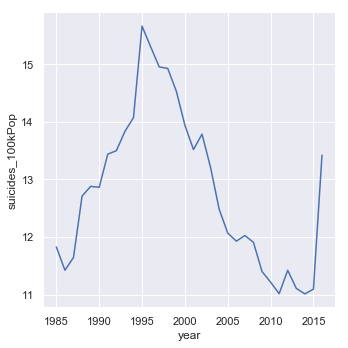

In [72]:
sns.relplot(x="year", y="suicides_100kPop", ci=None, kind='line', data=df);

In [73]:
# Insights
# Peak suicide rate was 15.3 deaths per 100k in 1995
# Decreased steadily, to 11 per 100k in 2014

# Suicide by Continent

In [74]:
tableau20=[(31,119,180),(174,199,232),(255,127,14), (255,187,120),
           (44,160,44),(152,223,138), (214,39,40),(255,152,150),
           (148,103,189),(197,176,213),(140,86,75), (196,156,148),
           (227,119,194),(247,182,210),(127,127,127),(199,199,199),
           (188,189,34),(219,219,141),(23,190,207),(158,218,229)]

# Scaling above RGB values to [0,1] range, which is Matplotlib acceptable format:
for i in range(len(tableau20)):
    r,g,b= tableau20[i]
    tableau20[i]=(r/255., g/255., b/255.)

In [75]:
tableau20[4]

(0.17254901960784313, 0.6274509803921569, 0.17254901960784313)

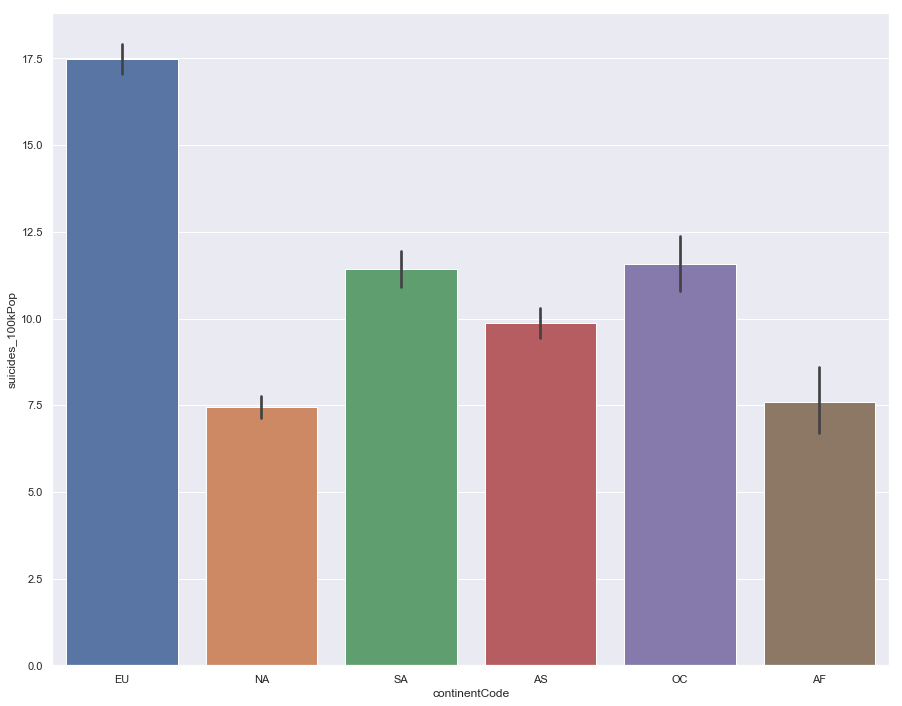

In [76]:

ax=sns.barplot(x="continentCode", y="suicides_100kPop", data=df);

# Global suicides per 100k by Age

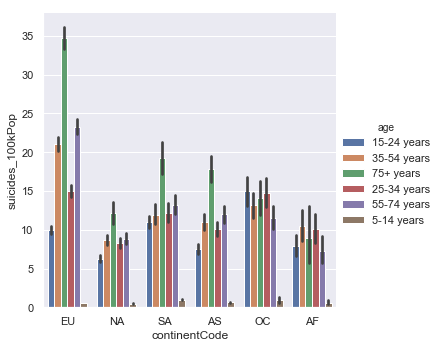

In [77]:
ax=sns.catplot(x="continentCode",y="suicides_100kPop",kind='bar',hue='age',data=df)